In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

%matplotlib notebook

### Obtenemos los datos

In [2]:
DF = pd.read_csv('USD_JPY_M5.csv', index_col=0)

In [3]:
DF = DF[150:]

In [4]:
DF.head()

,closeAsk,closeBid,complete,highAsk,highBid,lowAsk,lowBid,openAsk,openBid,time,volume,date
82,111.460,111.440,True,111.475,111.455,111.450,111.430,111.460,111.440,2008-01-02T06:50:00.000000Z,36,2008-01-02 06:50:00+00:00
83,111.460,111.440,True,111.495,111.475,111.456,111.436,111.465,111.445,2008-01-02T06:55:00.000000Z,56,2008-01-02 06:55:00+00:00
84,111.485,111.465,True,111.485,111.465,111.450,111.430,111.460,111.440,2008-01-02T07:00:00.000000Z,63,2008-01-02 07:00:00+00:00
85,111.542,111.522,True,111.552,111.532,111.475,111.455,111.481,111.461,2008-01-02T07:05:00.000000Z,59,2008-01-02 07:05:00+00:00
86,111.595,111.575,True,111.595,111.575,111.530,111.510,111.537,111.517,2008-01-02T07:10:00.000000Z,59,2008-01-02 07:10:00+00:00


In [5]:
DF = DF.sort_values(['date'], ascending=[True]).reset_index(drop=True)

In [6]:
DF.head()

,closeAsk,closeBid,complete,highAsk,highBid,lowAsk,lowBid,openAsk,openBid,time,volume,date
0,111.460,111.440,True,111.475,111.455,111.450,111.430,111.460,111.440,2008-01-02T06:50:00.000000Z,36,2008-01-02 06:50:00+00:00
1,111.460,111.440,True,111.495,111.475,111.456,111.436,111.465,111.445,2008-01-02T06:55:00.000000Z,56,2008-01-02 06:55:00+00:00
2,111.485,111.465,True,111.485,111.465,111.450,111.430,111.460,111.440,2008-01-02T07:00:00.000000Z,63,2008-01-02 07:00:00+00:00
3,111.542,111.522,True,111.552,111.532,111.475,111.455,111.481,111.461,2008-01-02T07:05:00.000000Z,59,2008-01-02 07:05:00+00:00
4,111.595,111.575,True,111.595,111.575,111.530,111.510,111.537,111.517,2008-01-02T07:10:00.000000Z,59,2008-01-02 07:10:00+00:00


In [7]:
DF['Open'] = (DF['openAsk'] + DF['openBid'])/2
DF['Close'] = (DF['closeAsk'] + DF['closeBid'])/2
DF['High'] = (DF['highAsk'] + DF['highBid'])/2
DF['Low'] = (DF['lowAsk'] + DF['lowBid'])/2
DF['Date'] = (DF['date'])

In [8]:
df = DF[['Date', 'Open', 'Close', 'High', 'Low']]
df['Date'] = df['Date'].astype(str).str[:-9]

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df.head()

,Date,Open,Close,High,Low
0,2008-01-02 06:50,111.450,111.450,111.465,111.440
1,2008-01-02 06:55,111.455,111.450,111.485,111.446
2,2008-01-02 07:00,111.450,111.475,111.475,111.440
3,2008-01-02 07:05,111.471,111.532,111.542,111.465
4,2008-01-02 07:10,111.527,111.585,111.585,111.520


<IPython.core.display.Javascript object>


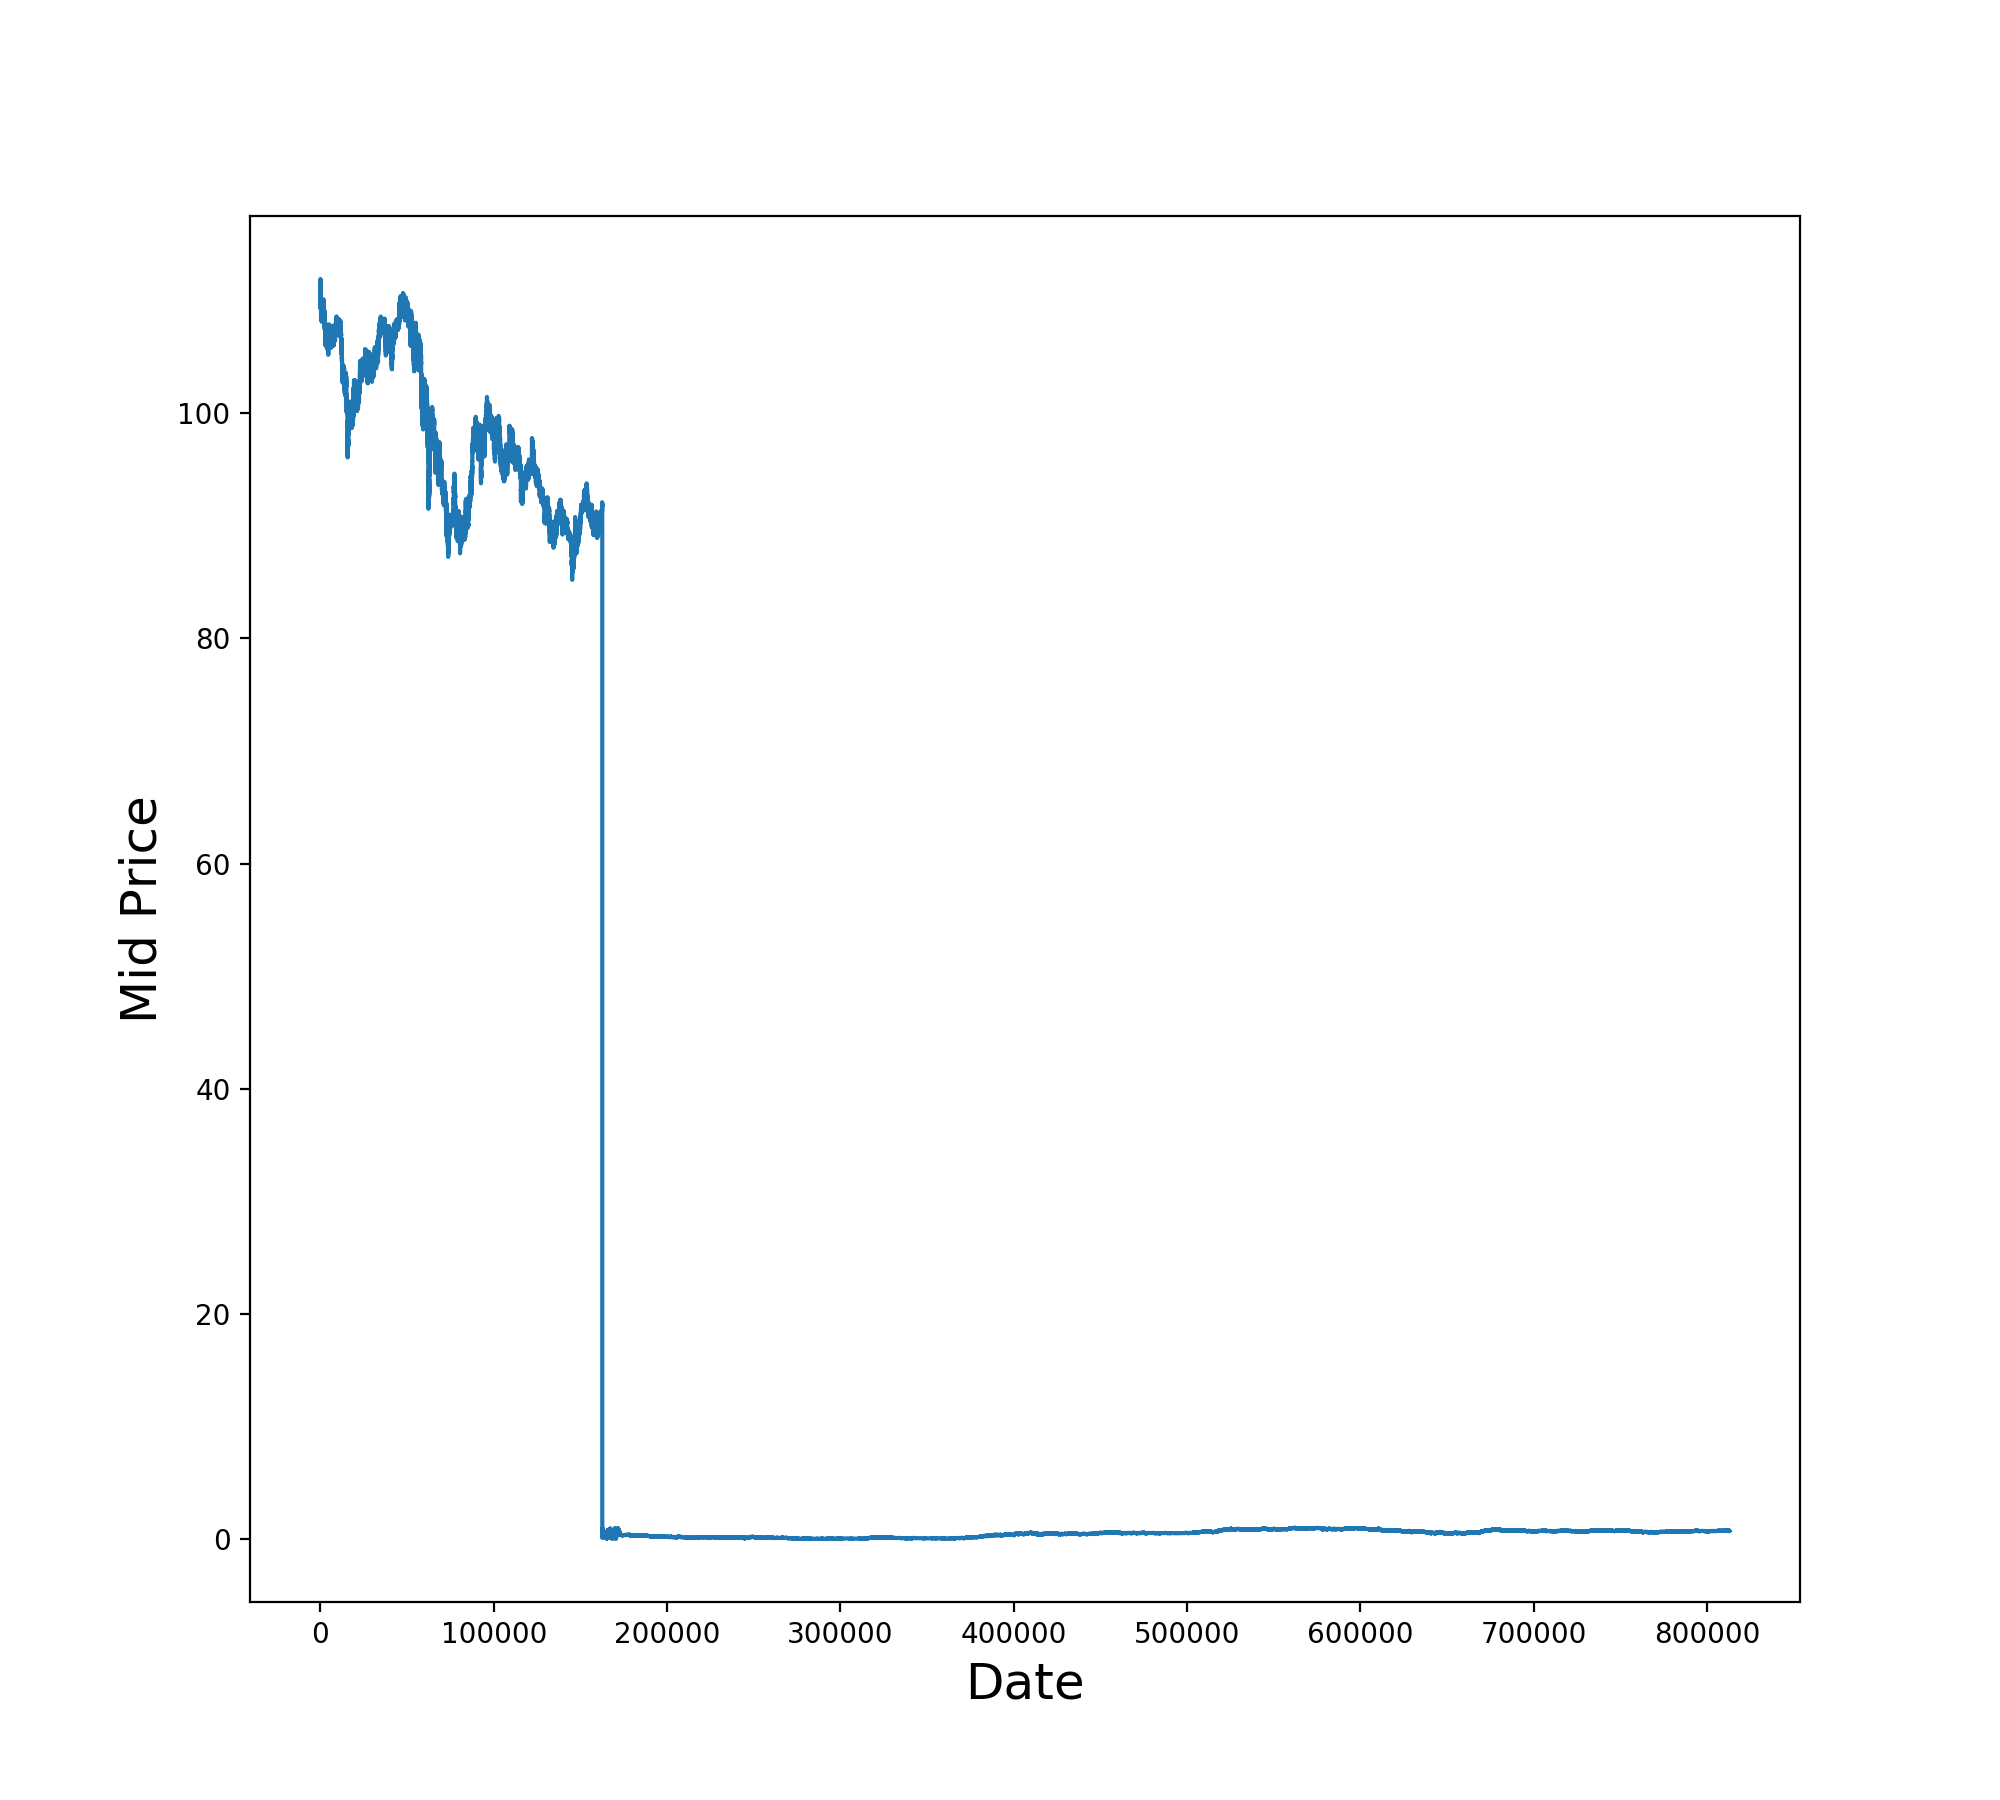

In [30]:
plt.figure(figsize = (10,9))
plt.plot(range(df.shape[0]),df['High'])
#plt.plot(range(df.shape[0]),(df['Low']))
#plt.plot(range(df.shape[0]),(df['High']))
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [11]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
train_data = high_prices[round(len(high_prices)-len(mid_prices)*.8):]
test_data = high_prices[:round(len(high_prices)-len(mid_prices)*.8)]

In [13]:
print(len(train_data), len(test_data))

650492 162623


In [14]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [25]:
train_data

array([0.09452457, 0.1793563 , 0.25645272, ..., 0.7377605 , 0.73723353,
       0.73715399])

In [15]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [16]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [17]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [18]:
len(df)

813115

In [19]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.7f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.0000554


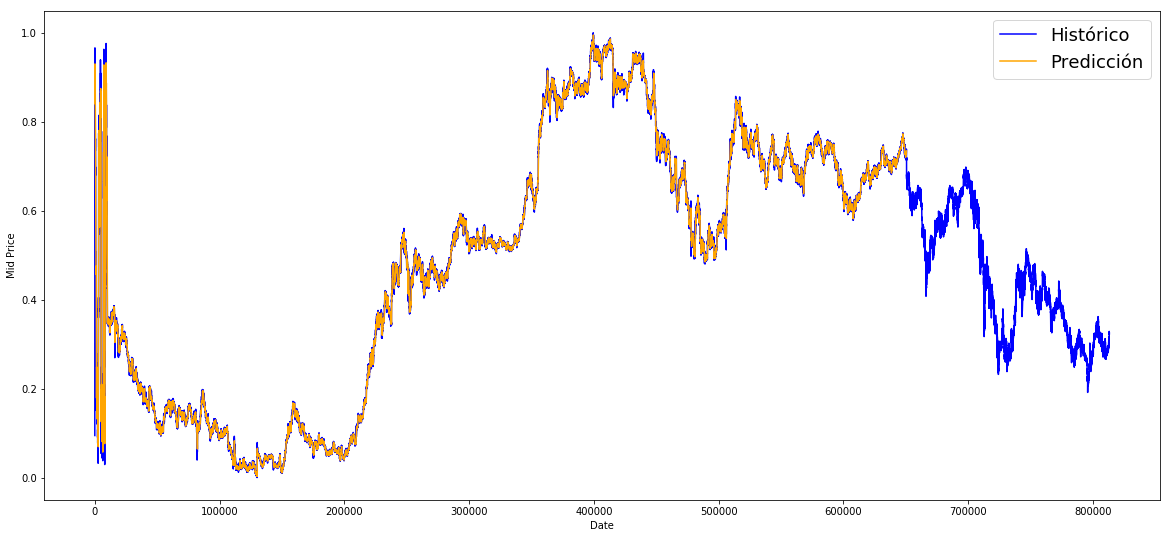

In [20]:
plt.figure(figsize = (20,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='Histórico')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Predicción')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [21]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.7f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.0000007


In [22]:
train_data

array([0.09452457, 0.1793563 , 0.25645272, ..., 0.7377605 , 0.73723353,
       0.73715399])

In [23]:
running_mean

0.737490641557866

<IPython.core.display.Javascript object>


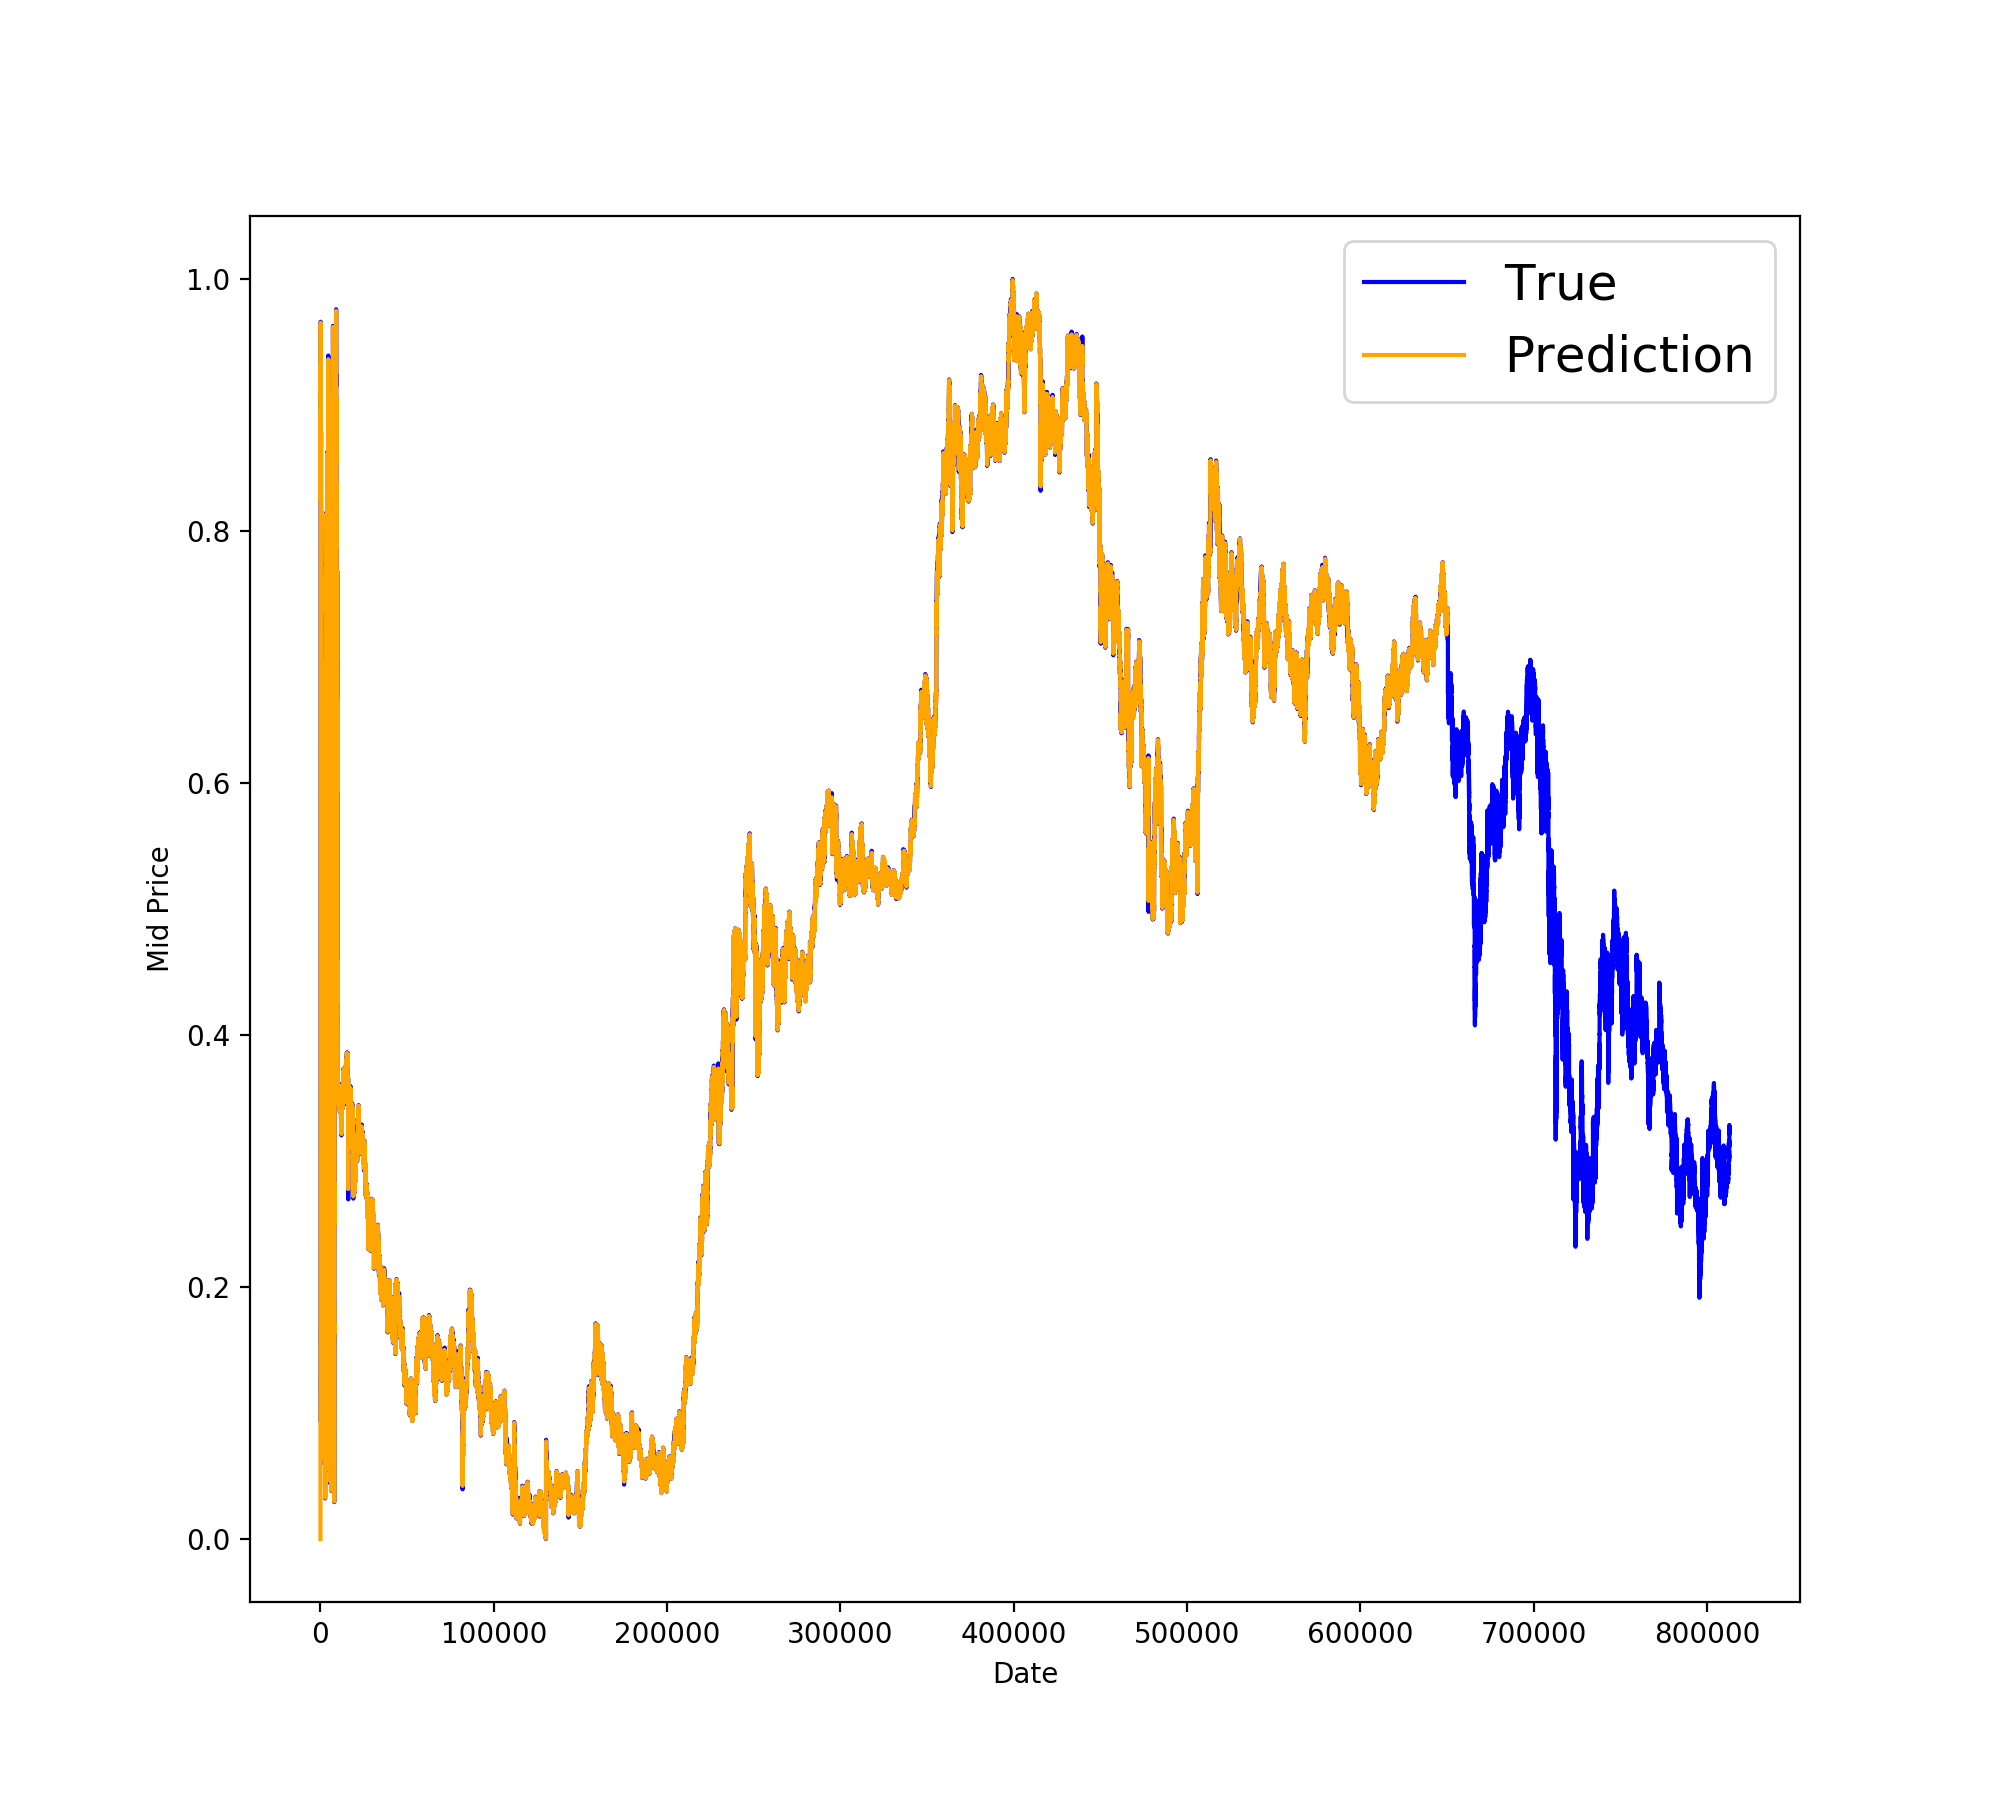

In [28]:
plt.figure(figsize = (10,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [33]:
min_window = 5
step = int(60/min_window)

high_bid = ['High' + str(min_window*(i+1)) for i in range(step)]

shifts = list(range(1,step+1))

for hb in zip(high_bid):
    df[hb] = df['High'].shift(s)

NameError: name 's' is not defined